In [1]:
%pwd

'/Users/kieranschubert/Desktop/BTK/btk_mac_os'

In [1]:
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import

import numpy as np

from btk import btk

import matplotlib.pyplot as plt

In [2]:
#INITIALIZATION
reader = btk.btkAcquisitionFileReader() 
#reader.SetFilename("CP_GMFCS1_01916_20130128_18.c3d") 
reader.SetFilename("CP_GMFCS1_01969_20150407_13.c3d")
#from convert_to_csv import file_names
#reader.SetFilename(file_names[0][j])
reader.Update()
acq = reader.GetOutput()

In [3]:
# PARAMETERS
freq = acq.GetPointFrequency() # give the point frequency
print('freq : ', freq)
n_frames = acq.GetPointFrameNumber() # give the number of frames
print('n_frames : ', n_frames)
first_frame = acq.GetFirstFrame()
print('first_frame : ', first_frame)

# metadata
metadata = acq.GetMetaData()

# EVENTS
n_events = acq.GetEventNumber()
print('n_event : ', n_events) # NUMBER OF EVENTS IN SEQUENCE
event = acq.GetEvent(0) # GET EVENT OF SEQUENCE
label = event.GetLabel() # LABEL OF EVENT
print('label : ', label)
context = event.GetContext() # L/R FOOT
print('context : ', context)
event_frame = event.GetFrame() # FRAME IN WHICH EVENT OCCURED
print('event_frame : ', event_frame)

# get points
point_labels = metadata.FindChild("POINT").value().FindChild("LABELS").value().GetInfo().ToString()
print('labels :', point_labels) # ALL MARKERS
points = acq.GetPoints().GetItemNumber()
print('points : ', points) #NUMBER OF MARKERS

event_labels = [acq.GetEvent(event).GetLabel() for event in range(n_events)]
#event_labels.sort()
event_context = [acq.GetEvent(event).GetContext() for event in range(n_events)]
#event_context.sort()
print(event_labels)
print(event_context)

freq :  100.0
n_frames :  271
first_frame :  1
n_event :  9
label :  Foot Strike
context :  Left
event_frame :  43
labels : ('LFHD', 'RFHD', 'LBHD', 'RBHD', 'C7  ', 'T10 ', 'STRN', 'CLAV', 'RBAK', 'LSHO', 'LELB', 'LWRA', 'LWRB', 'RSHO', 'RELB', 'RWRA', 'RWRB', 'LASI', 'RASI', 'LPSI', 'RPSI', 'LTHI', 'RTHI', 'LKNE', 'RKNE', 'LTIB', 'RTIB', 'LANK', 'RANK', 'LHEE', 'RHEE', 'RTOE', 'LTOE')
points :  33
['Foot Strike', 'Foot Off', 'Foot Strike', 'Foot Off', 'Foot Strike', 'Foot Off', 'Foot Strike', 'Foot Off', 'Foot Strike']
['Left', 'Right', 'Right', 'Left', 'Left', 'Right', 'Right', 'Left', 'Left']


In [ ]:
Frame = 0 #FRAME WE WANT TO EXTRACT
data_Frame = np.array([acq.GetPoint('LFHD').GetValues()[Frame,:],
                        acq.GetPoint('RFHD').GetValues()[Frame,:], 
                        acq.GetPoint('LBHD').GetValues()[Frame,:], 
                        acq.GetPoint('RBHD').GetValues()[Frame,:],
                        acq.GetPoint('C7').GetValues()[Frame,:],
                        acq.GetPoint('T10').GetValues()[Frame,:],
                        acq.GetPoint('STRN').GetValues()[Frame,:],
                        acq.GetPoint('CLAV').GetValues()[Frame,:],
                        acq.GetPoint('RBAK').GetValues()[Frame,:],
                        acq.GetPoint('LSHO').GetValues()[Frame,:],
                        acq.GetPoint('LELB').GetValues()[Frame,:],
                        acq.GetPoint('LWRA').GetValues()[Frame,:],
                        acq.GetPoint('LWRB').GetValues()[Frame,:],
                        acq.GetPoint('RSHO').GetValues()[Frame,:],
                        acq.GetPoint('RELB').GetValues()[Frame,:],
                        acq.GetPoint('RWRA').GetValues()[Frame,:],
                        acq.GetPoint('RWRB').GetValues()[Frame,:],
                        acq.GetPoint('LASI').GetValues()[Frame,:],
                        acq.GetPoint('RASI').GetValues()[Frame,:],
                        acq.GetPoint('LPSI').GetValues()[Frame,:],
                        acq.GetPoint('RPSI').GetValues()[Frame,:],
                        acq.GetPoint('LTHI').GetValues()[Frame,:],
                        acq.GetPoint('RTHI').GetValues()[Frame,:],
                        acq.GetPoint('LKNE').GetValues()[Frame,:],
                        acq.GetPoint('RKNE').GetValues()[Frame,:],
                        acq.GetPoint('LTIB').GetValues()[Frame,:],
                        acq.GetPoint('RTIB').GetValues()[Frame,:],
                        acq.GetPoint('LANK').GetValues()[Frame,:],
                        acq.GetPoint('RANK').GetValues()[Frame,:],
                        acq.GetPoint('LHEE').GetValues()[Frame,:],
                        acq.GetPoint('RHEE').GetValues()[Frame,:],
                        acq.GetPoint('RTOE').GetValues()[Frame,:],
                        acq.GetPoint('LTOE').GetValues()[Frame,:],
                        ])

print('array : ', data_Frame)
print('shape : ', data_Frame.shape)

In [4]:
# generalize to get an array of points for a set of frames
# get markers
markers = list()
start = False
for label in point_labels:
    label = label.replace(' ', '')
    if label == 'LFHD': #used C7
        start = True
    if label == 'CentreOfMass':
        break
    if start:
        markers.append(label)

print(point_labels)
print(len(markers))
print(markers)

# get events
n_events = acq.GetEventNumber()
event_frames = [acq.GetEvent(event).GetFrame() for event in range(n_events)]
event_frames.sort()
event_labels = [acq.GetEvent(event).GetLabel() for event in range(n_events)]
event_context = [acq.GetEvent(event).GetContext() for event in range(n_events)]
print(event_frames)
print(event_labels)
print(event_context)
start_frame = event_frames[0]-first_frame
end_frame = event_frames[-1]-first_frame
print(start_frame, end_frame)

# get data for each marker
data = [[acq.GetPoint(marker).GetValues()[frame,:] for marker in markers] for frame in range(start_frame, end_frame+1)]
data = np.array(data)
print(data.shape)
print(np.count_nonzero(np.isnan(data)))
#print(data)

('LFHD', 'RFHD', 'LBHD', 'RBHD', 'C7  ', 'T10 ', 'STRN', 'CLAV', 'RBAK', 'LSHO', 'LELB', 'LWRA', 'LWRB', 'RSHO', 'RELB', 'RWRA', 'RWRB', 'LASI', 'RASI', 'LPSI', 'RPSI', 'LTHI', 'RTHI', 'LKNE', 'RKNE', 'LTIB', 'RTIB', 'LANK', 'RANK', 'LHEE', 'RHEE', 'RTOE', 'LTOE')
33
['LFHD', 'RFHD', 'LBHD', 'RBHD', 'C7', 'T10', 'STRN', 'CLAV', 'RBAK', 'LSHO', 'LELB', 'LWRA', 'LWRB', 'RSHO', 'RELB', 'RWRA', 'RWRB', 'LASI', 'RASI', 'LPSI', 'RPSI', 'LTHI', 'RTHI', 'LKNE', 'RKNE', 'LTIB', 'RTIB', 'LANK', 'RANK', 'LHEE', 'RHEE', 'RTOE', 'LTOE']
[43, 54, 100, 114, 157, 167, 218, 230, 271]
['Foot Strike', 'Foot Off', 'Foot Strike', 'Foot Off', 'Foot Strike', 'Foot Off', 'Foot Strike', 'Foot Off', 'Foot Strike']
['Left', 'Right', 'Right', 'Left', 'Left', 'Right', 'Right', 'Left', 'Left']
42 270
(229, 33, 3)
0


In [5]:
import os
from os import listdir
from os.path import isfile, join
from collections import defaultdict

folders = ["CP", "FD", "ITW"]
mypath = "/Users/kieranschubert/Desktop/BTK/Sofamehack2019/Sub_DB_Checked/"
file_names = {}

for i in range(0, len(folders)):
	path = mypath + folders[i]
	file_names[i] = [f for f in listdir(path) if isfile(join(path, f))]
    
del file_names[0][0]
del file_names[1][0]
print(file_names)

{0: ['CP_GMFCS1_01916_20130128_18.c3d', 'CP_GMFCS1_01964_20130529_17.c3d', 'CP_GMFCS1_01969_20150407_13.c3d', 'CP_GMFCS1_01971_20130624_23.c3d', 'CP_GMFCS1_01972_20150202_19.c3d', 'CP_GMFCS1_01979_20180903_12.c3d', 'CP_GMFCS1_02037_20131202_15.c3d', 'CP_GMFCS1_02096_20170720_10.c3d', 'CP_GMFCS1_02097_20140324_17.c3d', 'CP_GMFCS1_02125_20140416_25.c3d', 'CP_GMFCS1_02173_20140602_38.c3d', 'CP_GMFCS1_02197_20140723_18.c3d', 'CP_GMFCS1_02300_20150114_21.c3d', 'CP_GMFCS1_02365_20150608_12.c3d', 'CP_GMFCS1_02452_20151020_07.c3d', 'CP_GMFCS1_02739_20160919_12.c3d', 'CP_GMFCS1_02761_20180911_13.c3d', 'CP_GMFCS1_02789_20170207_17.c3d', 'CP_GMFCS1_02917_20171009_07.c3d', 'CP_GMFCS1_03000_20180423_03.c3d', 'CP_GMFCS2_00113_20130603_20.c3d', 'CP_GMFCS2_00127_20090518_08.c3d', 'CP_GMFCS2_00145_20151014_08.c3d', 'CP_GMFCS2_00182_20080721_11.c3d', 'CP_GMFCS2_00239_20081029_14.c3d', 'CP_GMFCS2_00312_20081110_10.c3d', 'CP_GMFCS2_00351_20090202_16.c3d', 'CP_GMFCS2_00465_20140130_13.c3d', 'CP_GMFCS2_0061

-----CP_GMFCS1_01916_20130128_18.c3d
[17, 25, 64, 72, 109, 119, 156, 169]
['Foot Strike', 'Foot Off', 'Foot Strike', 'Foot Off', 'Foot Strike', 'Foot Off', 'Foot Strike', 'Foot Off']
['Left', 'Right', 'Right', 'Left', 'Left', 'Right', 'Right', 'Left']
-----CP_GMFCS1_01964_20130529_17.c3d
[6, 9, 53, 62, 102, 112, 155, 164, 204, 212, 257]
['Foot Strike', 'Foot Off', 'Foot Strike', 'Foot Off', 'Foot Strike', 'Foot Off', 'Foot Strike', 'Foot Off', 'Foot Strike', 'Foot Off', 'Foot Strike']
['Left', 'Right', 'Right', 'Left', 'Left', 'Right', 'Right', 'Left', 'Left', 'Right', 'Right']
-----CP_GMFCS1_01969_20150407_13.c3d
[43, 54, 100, 114, 157, 167, 218, 230, 271]
['Foot Strike', 'Foot Off', 'Foot Strike', 'Foot Off', 'Foot Strike', 'Foot Off', 'Foot Strike', 'Foot Off', 'Foot Strike']
['Left', 'Right', 'Right', 'Left', 'Left', 'Right', 'Right', 'Left', 'Left']
-----CP_GMFCS1_01971_20130624_23.c3d
[13, 22, 61, 68, 102, 111, 149, 155, 188, 196, 236, 241]
['Foot Strike', 'Foot Off', 'Foot Strik

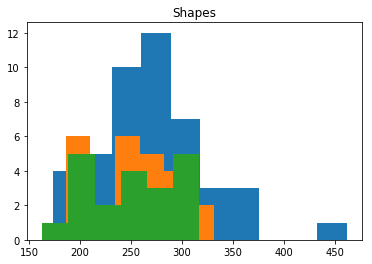

In [6]:
#INITIALIZATION
CP = {}
CP_shapes = {}
CP_labels = defaultdict(dict)
CP_context = defaultdict(dict)
FD = {}
FD_shapes = {}
FD_labels = defaultdict(dict)
FD_context = defaultdict(dict)
ITW = {}
ITW_shapes = {}
ITW_labels = defaultdict(dict)
ITW_context = defaultdict(dict)


for i in range(0, len(file_names.keys())):
    
    for j in range(0, len(file_names[i])):
        
        reader = btk.btkAcquisitionFileReader() 
        k = 0
        
        reader.SetFilename(file_names[i][j]) 
        reader.Update()
        acq = reader.GetOutput()

        markers = list()
        start = False
        for label in point_labels:
            label = label.replace(' ', '')
            if label == 'LFHD': #used C7
                start = True
            if label == 'CentreOfMass':
                break
            if start:
                markers.append(label)
        
        # get events
        end_frame = acq.GetPointFrameNumber() # give the number of frames
        first_frame = acq.GetFirstFrame()
        #start_frame = event_frames[0]-first_frame
        #end_frame = event_frames[-1]-first_frame
        
        n_events = acq.GetEventNumber()
        events = [acq.GetEvent(event) for event in range(n_events)]
        event_frames = [acq.GetEvent(event).GetFrame() for event in range(n_events)]
        event_frames.sort()
        event_labels = [acq.GetEvent(event).GetLabel() for event in range(n_events)]
        event_context = [acq.GetEvent(event).GetContext() for event in range(n_events)]
         
        print('-----' + file_names[i][j])    
        print(event_frames)
        print(event_labels)
        print(event_context)
        
        
        # get data for each marker
        data = [[acq.GetPoint(marker).GetValues()[frame,:] for marker in markers] for frame in range(first_frame, end_frame)]
        
        if i == 0:
            CP[j] = np.array(data)
            CP_shapes[j] = CP[j].shape
            
            for h in range(0, CP_shapes[j][0]): #loop through all frames of individual j
                
                if k < len(event_frames) and event_frames[k] == h:
                    label = np.repeat(event_labels[k], CP[j][h].shape[0])
                    context = np.repeat(event_context[k], CP[j][h].shape[0])
                    CP_labels[j][h] = label
                    CP_context[j][h] = context
                    k += 1      
                else:  
                    CP_labels[j][h] = np.zeros(CP[j][h].shape[0])
                    CP_context[j][h] = np.zeros(CP[j][h].shape[0])
                    
            #print(np.count_nonzero(np.isnan(data)))
            
        elif i == 1:
            FD[j] = np.array(data)
            FD_shapes[j] = FD[j].shape
            
            for h in range(0, FD_shapes[j][0]): #loop through all frames of individual j
                
                if k < len(event_frames) and event_frames[k] == h:
                    label = np.repeat(event_labels[k], FD[j][h].shape[0])
                    context = np.repeat(event_context[k], FD[j][h].shape[0])
                    FD_labels[j][h] = label
                    FD_context[j][h] = context
                    k += 1      
                else: 
                    FD_labels[j][h] = np.zeros(FD[j][h].shape[0])
                    FD_context[j][h] = np.zeros(FD[j][h].shape[0])

            #print(np.count_nonzero(np.isnan(data)))
            
        else:
            ITW[j] = np.array(data)
            ITW_shapes[j] = ITW[j].shape
            
            for h in range(0, ITW_shapes[j][0]): #loop through all frames of individual j
                
                if k < len(event_frames) and event_frames[k] == h:
                    label = np.repeat(event_labels[k], ITW[j][h].shape[0])
                    context = np.repeat(event_context[k], ITW[j][h].shape[0])
                    ITW_labels[j][h] = label
                    ITW_context[j][h] = context
                    k += 1      
                else: 
                    ITW_labels[j][h] = np.zeros(ITW[j][h].shape[0])
                    ITW_context[j][h] = np.zeros(ITW[j][h].shape[0])
            
            #print(np.count_nonzero(np.isnan(data)))

    
plt.hist([item[0] for item in CP_shapes.values()], bins='auto')
plt.title('Shapes')
plt.hist([item[0] for item in FD_shapes.values()], bins='auto')
plt.hist([item[0] for item in ITW_shapes.values()], bins='auto')
plt.show()

In [7]:
CP[0].shape #first CP patient, 174 time points, 33 variables measured, 3 space coordinates

(174, 33, 3)

In [8]:
#SAVE INDIVIDUAL PATIENTS IN CSV, ALL THEIR FRAMES CONCATENATED WITH LABELS AND CONTEXT, NANs REMOVED
x = [s + '_x' for s in markers]
y = [s + '_y' for s in markers]
z = [s + '_z' for s in markers]
head = ",".join(['frame'] + x + y + z + ['label'] + ['context'])

CP_patients = {}
FD_patients = {}
ITW_patients = {}

for i in range(0, len(CP.keys())):
    CP_selected = np.reshape(CP[i][0].T, (CP[i][0].size,1)).T
    CP_labels_selected = np.unique(CP_labels[i][0])
    CP_context_selected = np.unique(CP_context[i][0])
   
    for j in range(1, len(CP[i])):
        CP_selected = np.append(CP_selected, np.reshape(CP[i][j].T, (CP[i][j].size,1)).T, axis=0)
        CP_labels_selected = np.append(CP_labels_selected, np.unique(CP_labels[i][j]), axis=0)
        CP_context_selected = np.append(CP_context_selected, np.unique(CP_context[i][j]), axis=0)

    CP_patients[i] = np.column_stack((np.arange(0, len(CP[i])), CP_selected, CP_labels_selected, CP_context_selected))
    np.savetxt("/Users/kieranschubert/Desktop/BTK/btk_mac_os/Individual_patients/" + file_names[0][i] + ".csv", CP_patients[i], fmt="%s", delimiter=",", header=head)
    
for i in range(0, len(FD.keys())):
    FD_selected = np.reshape(FD[i][0].T, (FD[i][0].size,1)).T
    FD_labels_selected = np.unique(FD_labels[i][0])
    FD_context_selected = np.unique(FD_context[i][0])
    for j in range(1, len(FD[i])):
        FD_selected = np.append(FD_selected, np.reshape(FD[i][j].T, (FD[i][j].size,1)).T, axis=0)
        FD_labels_selected = np.append(FD_labels_selected, np.unique(FD_labels[i][j]), axis=0)
        FD_context_selected = np.append(FD_context_selected, np.unique(FD_context[i][j]), axis=0)
    
    FD_patients[i] = np.column_stack((np.arange(0, len(FD[i])), FD_selected, FD_labels_selected, FD_context_selected))
    np.savetxt("/Users/kieranschubert/Desktop/BTK/btk_mac_os/Individual_patients/" + file_names[1][i] + ".csv", FD_patients[i], fmt="%s", delimiter=",", header=head)

for i in range(0, len(ITW.keys())):
    ITW_selected = np.reshape(ITW[i][0].T, (ITW[i][0].size,1)).T
    ITW_labels_selected = np.unique(ITW_labels[i][0])
    ITW_context_selected = np.unique(ITW_context[i][0])
    for j in range(1, len(ITW[i])):
        ITW_selected = np.append(ITW_selected, np.reshape(ITW[i][j].T, (ITW[i][j].size,1)).T, axis=0)
        ITW_labels_selected = np.append(ITW_labels_selected, np.unique(ITW_labels[i][j]), axis=0)
        ITW_context_selected = np.append(ITW_context_selected, np.unique(ITW_context[i][j]), axis=0)
    
    ITW_patients[i] = np.column_stack((np.arange(0, len(ITW[i])), ITW_selected, ITW_labels_selected, ITW_context_selected))
    np.savetxt("/Users/kieranschubert/Desktop/BTK/btk_mac_os/Individual_patients/" + file_names[2][i] + ".csv", ITW_patients[i], fmt="%s", delimiter=",", header=head)

#MERGED PATIENT DATA FOR EACH DISORDER

CP_merged = CP_patients[0]
for i in range(1, len(CP_patients.keys())):
    CP_merged = np.append(CP_merged, CP_patients[i], axis=0)
    
print(CP_merged.shape)

FD_merged = FD_patients[0]
for i in range(1, len(FD_patients.keys())):
    FD_merged = np.append(FD_merged, FD_patients[i], axis=0)
    
print(FD_merged.shape)

ITW_merged = ITW_patients[0]
for i in range(1, len(ITW_patients.keys())):
    ITW_merged = np.append(ITW_merged, ITW_patients[i], axis=0)
    
print(ITW_merged.shape)

(12192, 102)
(6319, 102)
(4993, 102)


In [9]:
np.savetxt("/Users/kieranschubert/Desktop/BTK/btk_mac_os/Individual_patients/CP_merged.csv", CP_merged, fmt="%s", delimiter=",", header=head)
np.savetxt("/Users/kieranschubert/Desktop/BTK/btk_mac_os/Individual_patients/FD_merged.csv", FD_merged, fmt="%s", delimiter=",", header=head)
np.savetxt("/Users/kieranschubert/Desktop/BTK/btk_mac_os/Individual_patients/ITW_merged.csv", ITW_merged, fmt="%s", delimiter=",", header=head)

In [10]:
print(CP_merged.shape)
print(FD_merged.shape)
print(ITW_merged.shape)

print(CP_merged.shape[0]+FD_merged.shape[0]+ITW_merged.shape[0])

(12192, 102)
(6319, 102)
(4993, 102)
23504


In [ ]:
# GET LABELS AND CONTEXT OF EVENTS
CP_labels_all = []
CP_context_all = []
for i in range(0, len(CP_labels.keys())):
    for j in range(0, len(CP_labels[i])):
        CP_labels_all.append(np.vstack(CP_labels[i][j][:]))
        CP_context_all.append(np.vstack(CP_context[i][j][:]))
    
CP_labels_all = np.array(CP_labels_all)
CP_labels_all = np.vstack(CP_labels_all)
CP_context_all = np.array(CP_context_all)
CP_context_all = np.vstack(CP_context_all)

FD_labels_all = []
FD_context_all = []
for i in range(0, len(FD_labels.keys())):
    for j in range(0, len(FD_labels[i])):
        FD_labels_all.append(np.vstack(FD_labels[i][j][:]))
        FD_context_all.append(np.vstack(FD_context[i][j][:]))
    
FD_labels_all = np.array(FD_labels_all)
FD_labels_all = np.vstack(FD_labels_all)
FD_context_all = np.array(FD_context_all)
FD_context_all = np.vstack(FD_context_all)

ITW_labels_all = []
ITW_context_all = []
for i in range(0, len(ITW_labels.keys())):
    for j in range(0, len(ITW_labels[i])):
        ITW_labels_all.append(np.vstack(ITW_labels[i][j][:]))
        ITW_context_all.append(np.vstack(ITW_context[i][j][:]))
    
ITW_labels_all = np.array(ITW_labels_all)
ITW_labels_all = np.hstack(ITW_labels_all)
ITW_context_all = np.array(ITW_context_all)
ITW_context_all = np.hstack(ITW_context_all)